In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
plt.style.use('ggplot')

In [2]:
df = pd.read_excel('./2218-V1.xlsx')
df.head()

Timestamp (YYYY-MM-DDThh:mm:ss)  Glucose Value (mg/dL) food consumed
0             2023-08-08T13:13:30                    190           NaN
1             2023-08-08T13:18:30                    187           NaN
2             2023-08-08T13:23:30                    167           NaN
3             2023-08-08T13:28:30                    171           NaN
4             2023-08-08T13:33:30                    167           NaN

In [3]:
glucose = df['Glucose Value (mg/dL)'].values
timestamp = df['Timestamp (YYYY-MM-DDThh:mm:ss)'].values
# partitions = np.linspace(0, len(df), 4).astype(np.int32)
partitions = [0, 2886, 5990, 8968]
food_timesteps = df['food consumed']
food_timesteps = food_timesteps[~pd.isna(food_timesteps)].index

df1, df2, df3 = df[partitions[0]:partitions[1]], df[partitions[1]:partitions[2]], df[partitions[2]:partitions[3]]
df.shape


(8969, 3)

In [4]:
dataset = {}

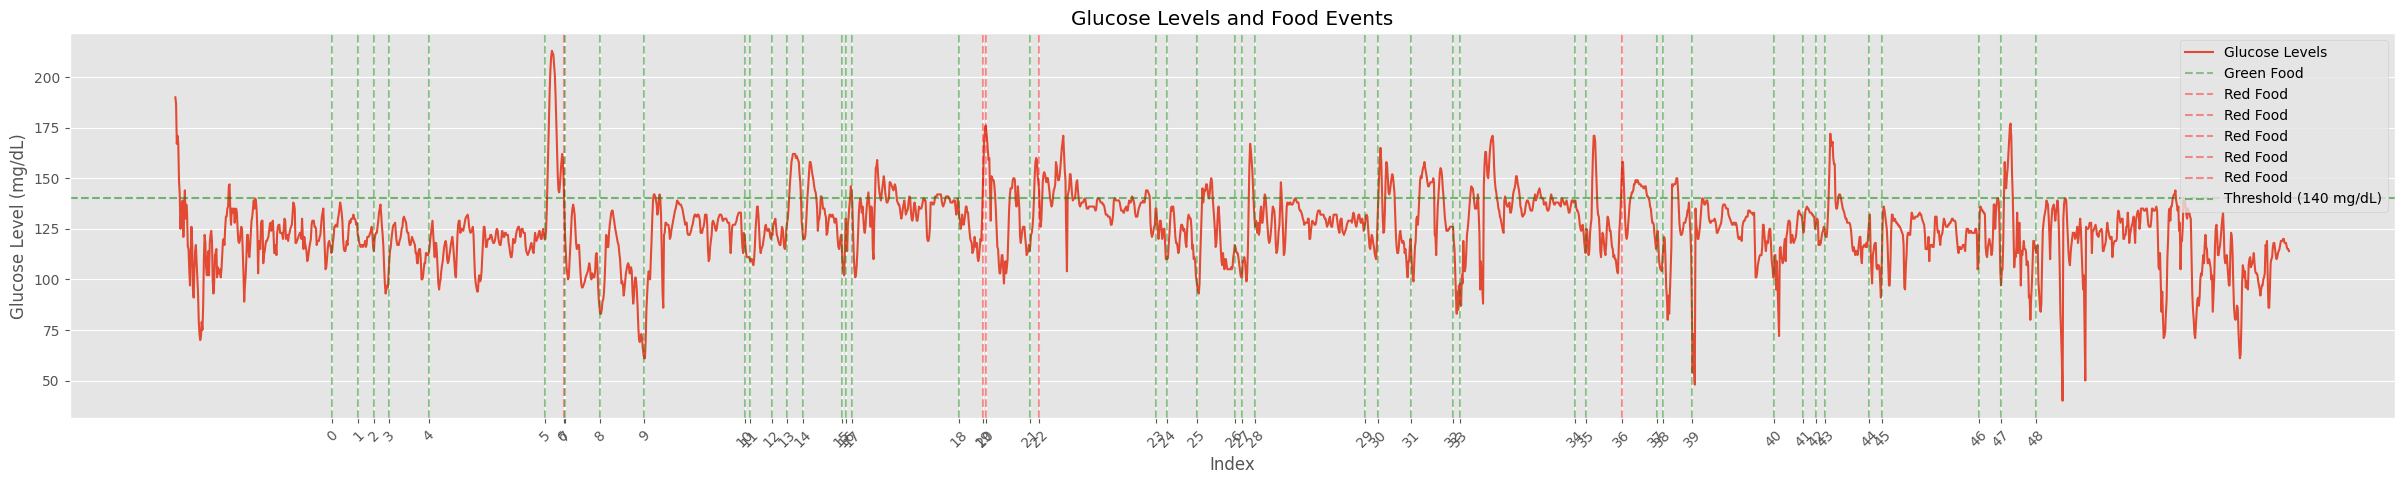

In [5]:
glucose = df1['Glucose Value (mg/dL)'].values
food_consumed = df1['food consumed'].fillna(0).values
food_timesteps1 = df1['food consumed']
food_timesteps1 = food_timesteps1[~pd.isna(food_timesteps1)].index

# Create dictionaries for red and green foods
red_foods = {}
green_foods = {}

# Classify foods based on glucose levels
for i, timestep in enumerate(food_timesteps1):
    if glucose[timestep] > 140:
        red_foods[i] = food_consumed[timestep]
    else:
        green_foods[i] = food_consumed[timestep]

# Plot the glucose levels with meal markers
plt.figure(figsize=(30, 5))
plt.plot(glucose, label="Glucose Levels")
for i in food_timesteps1:
    plt.axvline(i, color='r' if glucose[i] > 140 else 'g', linestyle='--', alpha=0.4,
                label="Red Food" if glucose[i] > 140 else "Green Food" if i == food_timesteps1[0] else "")
plt.axhline(140, color='g', linestyle='--', alpha=0.5, label="Threshold (140 mg/dL)")
plt.xticks(food_timesteps1, np.arange(len(food_timesteps1)), rotation=45)
plt.legend()
plt.title("Glucose Levels and Food Events")
plt.xlabel("Index")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

# Print red and green foods
print("Red Foods (Glucose > 140):")
for idx, food in red_foods.items():
    print(f"{idx} : {food}")

print("\nGreen Foods (Glucose <= 140):")
for idx, food in green_foods.items():S
    print(f"{idx} : {food}")


In [6]:
food_timesteps1_new = np.insert(food_timesteps1, len(food_timesteps1), len(glucose) - 1)
food_timesteps1_diff = np.diff(food_timesteps1_new)
scores1 = []
for i in range(0, len(food_timesteps1_diff)):
    scores1.append(np.mean(np.abs(glucose[food_timesteps1_new[i]:food_timesteps1_new[i+1]] - 140)))

for i, timestep in enumerate(food_timesteps1):
    if food_consumed[timestep] not in dataset.keys():
        dataset[food_consumed[timestep]] = [scores1[i]]
    else:
        dataset[food_consumed[timestep]].append(scores1[i])

Red Foods (Glucose > 140):
6 : Walnut,Coffee
19 : Juice,1/4 sugary croissant, 1/2 egg tart, 1/2 small cinnamon roll
20 : 2 sliders, scrambled egg, ham slice, fries
22 : ice cream, cashew ritter sport 4 pieces
36 : Peeled baby carrots, brown ricce, onion, egg, milk

Green Foods (Glucose <= 140):
0 : Coffee and half and half, One croissant
1 : Walnut halves
2 : Lasagna
3 : Strawberries
4 : Shrimp,Salman, Salad, French Fries
5 : Glucose test
7 : Smoothie: Mango, Strawberries, Banana, Cherry juice, Nutmeg cinnamon, Pineapple yogurt
8 : Coffee, Half and half
9 : Lasagna, Tuscan white, bread
10 : Coffee, Half and half
11 : Rice Crispy, cereal, milk, mango
12 : Walnut
13 : Multi grain bread, peanut butter
14 : Lasagna, meatballs, cheeses
15 : Hummus, pita chips
16 : brown jasmine rice, beef chimmichuri, mumbo sauce, red wine 
17 : gelato
18 : Coffee and half and half, one walnut 
21 : 2 polish sausage, 2 pretzel rolls
23 : Coffee and half and half, one walnut 
24 : smoothie: Mango, Strawberri

### Observation
Based on the above plots and some extra searching on the interenet, we can observe that:

The following can be classified as potential Red Foods:

1. Sugary and Refined Carbs:

    - Coffee with half and half (Items 0, 8, 10, 18, 29, 34, 46): Half and half has some carbs, especially if sugar is added.
    - Croissant, bread, cereal, ice cream, gelato (Items 0, 9, 11, 17, 22, 28): High in refined carbs and sugars.
    - Smoothies with fruit (Items 7, 24, 30): Mango, banana, and pineapple are high in sugar, especially when combined with other fruits.

2. Processed Snacks:

    - French fries, chips, pretzel rolls (Items 4, 15, 21, 25): High in refined carbs and fats, leading to glucose spikes.
    - Sugar-filled pastries (Items 19): Croissants, egg tarts, and cinnamon rolls are high in sugar and refined carbs.

3. Alcohol and Sweetened Drinks:

    - Beer, cherry juice, fruit juices (Items 27, 39): Beer and sugary juices can cause glucose spikes due to alcohol and sugar content.

The following can be classified as non-red foods and potential green food:

1. Whole Foods with Lower Glycemic Impact:

    - Walnuts, peanut butter, hummus, soft-boiled eggs (Items 1, 6, 12, 15, 35): These are high in healthy fats and protein, with minimal impact on glucose.
    - Green salad, carrots, and vegetables (Items 26, 44, 37): Non-starchy vegetables are low in carbohydrates and unlikely to spike glucose.

2. Lean Proteins and Fiber-Rich Foods:

    - Chicken curry, beef chimichurri, sausage (Items 16, 33, 38): Protein and fiber-rich foods typically have a minimal effect on glucose.

We need to look at more data to find for patterns.


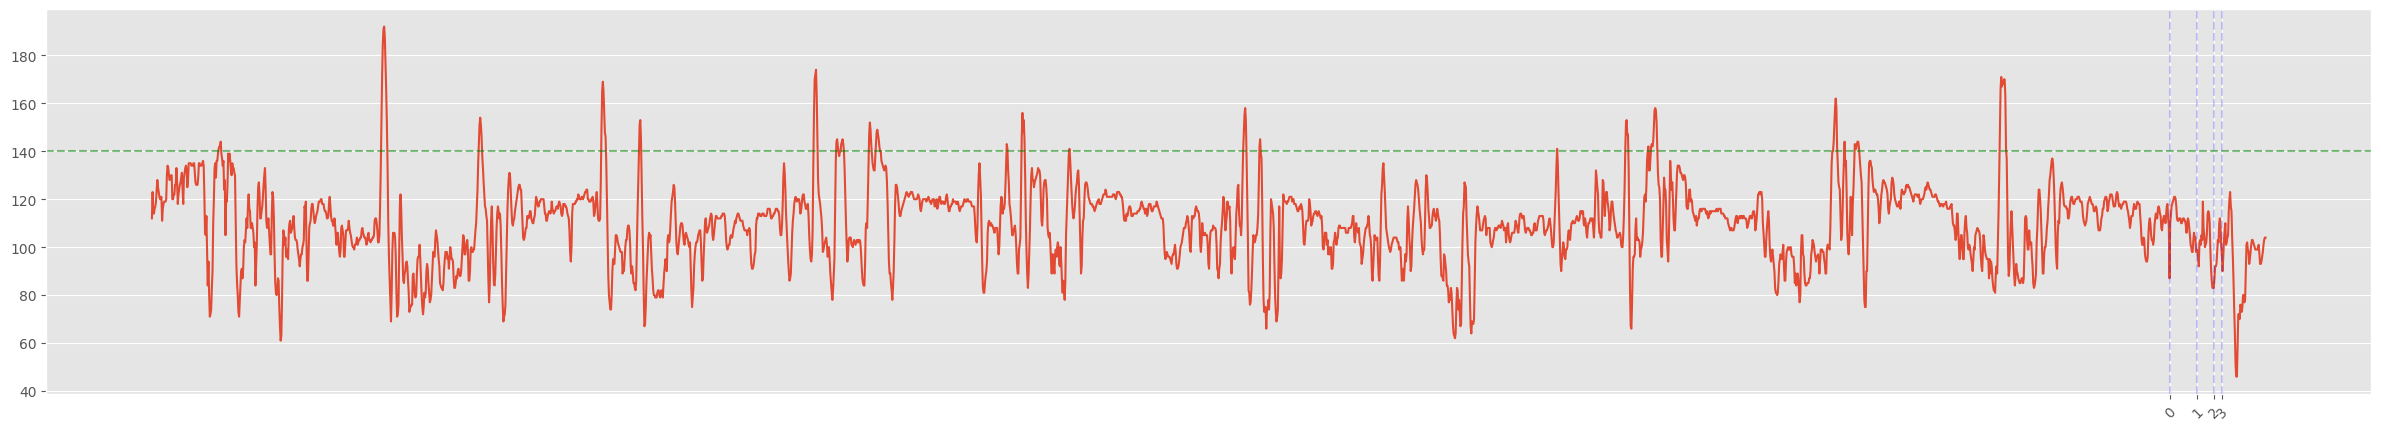

0 : 1/4 peanut butter sandwich, sparkling water, 2 strawberries
1 : 1half walnut, 2 strawberries
2 : caprese salad , truffle burger
3 : apple pie, vanilla ice cream


In [7]:

glucose2 = df2['Glucose Value (mg/dL)'].values
food_consumed2 = df2['food consumed'].fillna(0).values
food_timesteps2 = df2['food consumed']
food_timesteps2 = food_timesteps2[~pd.isna(food_timesteps2)].index - partitions[1]


plt.figure(figsize=(30, 5))
plt.plot(glucose2)
for i in food_timesteps2:
    plt.axvline(i, color='b', linestyle='--', alpha=0.2)
plt.axhline(140, color='g', linestyle='--', alpha=0.5)
plt.xticks(food_timesteps2, np.arange(len(food_timesteps2)), rotation=45)

plt.show()
for i, timestep in enumerate(food_timesteps2):
    print(f"{i} : {food_consumed2[timestep]}")

In [8]:
food_timesteps2_new = np.insert(food_timesteps2,  len(food_timesteps2), len(glucose2) - 1)
food_timesteps2_diff = np.diff(food_timesteps2_new)
scores2 = []
for i in range(0, len(food_timesteps2_diff)):
    scores2.append(np.mean(np.abs(glucose2[food_timesteps2_new[i]:food_timesteps2_new[i+1]] - 140)))

for i, timestep in enumerate(food_timesteps2):
    if food_consumed2[timestep] not in dataset.keys():
        dataset[food_consumed2[timestep]] = [scores2[i]]
    else:
        dataset[food_consumed2[timestep]].append(scores2[i])

### Observation





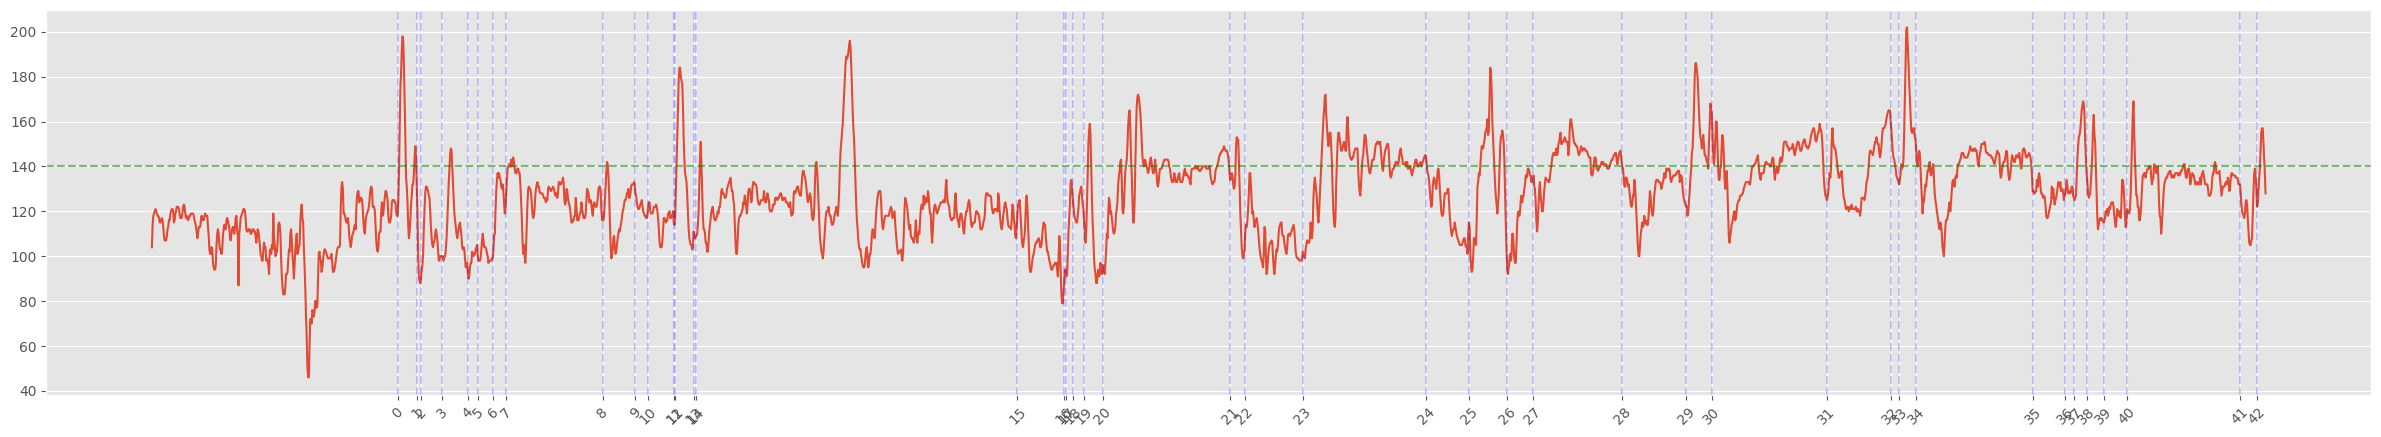

0 : glucose test
1 : coffee and milk
2 : mushrooms, baked potato, 2 scrambled eggs, milk
3 : pancakes
4 : yellow pepper
5 : caprese salad, mozzarella
6 : steamed veg, brown jasmine rice, chicken curry
7 : 3 strawberries
8 : coffee and milk
9 : walnut halves
10 : 1/2 peanut butter sandwich, 2 strawberries
11 : apple pie
12 : strawberry
13 : eggs, wine
14 : green salad, fries
15 : coffee and milk
16 : swiss cheese, 1 cracker
17 : smoothie, yogurt
18 : ginger, carrot soup
19 : hippeas
20 : 2 slices pizza
21 : coffee and milk, cereal
22 : pizza, water
23 : steak , red wine, ice cream
24 : coffee, milk
25 : 2 1/2 pizza slices
26 : steak salad
27 : 1 advil
28 : coffee, egg toast
29 : small pieces veg pizza, red wine
30 : ice cream, vanilla and choclate water
31 : coffee and cream, ham, egg, cheese on croissant
32 : walnut half
33 : swiss cheese, burger 
34 : lettuce and carrots
35 : coffee and milk, salad
36 : walnut half
37 : peanut, butter sandwich
38 : butter, lettuce
39 : red pepper, cuc

In [9]:

glucose3 = df3['Glucose Value (mg/dL)'].values
food_consumed3 = df3['food consumed'].fillna(0).values
food_timesteps3 = df3['food consumed']
food_timesteps3 = food_timesteps3[~pd.isna(food_timesteps3)].index - partitions[2]


plt.figure(figsize=(30, 5))
plt.plot(glucose3)
for i in food_timesteps3:
    plt.axvline(i, color='b', linestyle='--', alpha=0.2)
plt.axhline(140, color='g', linestyle='--', alpha=0.5)
plt.xticks(food_timesteps3, np.arange(len(food_timesteps3)), rotation=45)

plt.show()
for i, timestep in enumerate(food_timesteps3):
    print(f"{i} : {food_consumed3[timestep]}")

In [10]:
food_timesteps3_new = np.insert(food_timesteps3, len(food_timesteps3), len(glucose3) - 1)
food_timesteps3_diff = np.diff(food_timesteps3_new)
scores3 = []
for i in range(0, len(food_timesteps3_diff)):
    scores3.append(np.mean(np.abs(glucose3[food_timesteps3_new[i]:food_timesteps3_new[i+1]] - 140)))


for i, timestep in enumerate(food_timesteps3):
    if food_consumed3[timestep] not in dataset.keys():
        dataset[food_consumed3[timestep]] = [scores3[i]]
    else:
        dataset[food_consumed3[timestep]].append(scores3[i])

### Observation

The following can be potential red-foods:

1. Refined Carbs and Sugary Foods:

    - Pancakes, pizza, croissants (Items 3, 20, 25, 31): High in refined carbs and sugar, which can cause glucose spikes.
    - Apple pie, ice cream (Items 11, 23, 30): Sugary desserts with refined carbs can elevate blood glucose.

2. Sugary and Processed Snacks:

    - Cereal (Item 21): Many breakfast cereals are high in sugar and refined carbs, causing glucose spikes.
    - Smoothies with fruit and yogurt (Items 17, 42): Depending on the fruits and yogurt used, these can be high in sugar.

3. Starchy Vegetables and Processed Foods:

    - Fries, baked potato (Items 14, 2): High in starch and can raise blood glucose.
    - Cracker (Item 16): Usually made from refined flour, which can spike glucose.

The following are non-red foods and potentially green-foods:

1. Whole Foods with Healthy Fats and Proteins:

    - Coffee with milk (Items 1, 8, 24): Minimal impact on glucose, especially with unsweetened milk.
    - Walnuts, peanut butter (Items 9, 10, 32, 36): High in healthy fats, which help stabilize blood sugar levels.

2. Lean Proteins and Fiber-Rich Foods:

    - Eggs, steak, salmon (Items 2, 13, 23, 40): High-protein foods that are less likely to cause glucose spikes.
    - Green salad, caprese salad, lettuce, and carrots (Items 5, 14, 34, 40): Low-carb vegetables with fiber and healthy fats.

3. Non-Starchy Vegetables:

    - Steamed veggies, peppers, cucumber (Items 6, 4, 39): Low-carb, high in fiber, and unlikely to cause glucose spikes.
    

### Conclusion

#### Common Red Foods:
1. Refined Carbs and Sugary Foods: Croissants, bread, pizza, pancakes, apple pie, ice cream Smoothies with high-sugar fruits

2. Processed Snacks: French fries, chips, pretzel rolls, sugary pastries Cereal

3. Sugary Drinks and Alcohol: Beer, cherry juice, fruit juices

#### Common Green Foods:
1. Whole Foods with Healthy Fats and Proteins: Walnuts, peanut butter, hummus, eggs

2. Lean Proteins and Fiber-Rich Foods: Chicken, beef, sausage, steak, salmon

3. Non-Starchy Vegetables: Green salad, carrots, steamed veggies, peppers, cucumber

In [11]:
dataset_final = {}

for k, v in dataset.items():
    score = np.mean(v)
    if score != 0:
        dataset_final[k] = np.mean(v)

dataset_final

{'Coffee and half and half, One croissant': 14.25,
 'Walnut halves': 20.761904761904763,
 'Lasagna': 23.523809523809526,
 'Strawberries': 22.444444444444443,
 'Shrimp,Salman, Salad, French Fries': 22.38364779874214,
 'Glucose test': 34.44,
 'Walnut,Coffee': 7.5,
 'Smoothie: Mango, Strawberries, Banana, Cherry juice, Nutmeg cinnamon, Pineapple yogurt': 31.416666666666668,
 'Coffee, Half and half': 32.65833333333333,
 'Lasagna, Tuscan white, bread': 15.159420289855072,
 'Rice Crispy, cereal, milk, mango': 20.133333333333333,
 'Walnut': 17.857142857142858,
 'Multi grain bread, peanut butter': 14.636363636363637,
 'Lasagna, meatballs, cheeses': 11.169811320754716,
 'Hummus, pita chips': 28.166666666666668,
 'brown jasmine rice, beef chimmichuri, mumbo sauce, red wine ': 9.75,
 'gelato': 8.66876712328767,
 'Coffee and half and half, one walnut ': 15.426262626262627,
 'Juice,1/4 sugary croissant, 1/2 egg tart, 1/2 small cinnamon roll': 26.333333333333332,
 '2 sliders, scrambled egg, ham slic

In [12]:
X, y = [], []

def clean(text):
    import re
    return re.sub(r'[^\w\s]', '', text).strip().lower()

for k, v in dataset_final.items():
    # food = " ".join([clean(food).strip() for food in k.split(',')])
    # X.append([f for f in food.split(' ')])
    X.append(' '.join(clean(k).split()))
    y.append(v)

X


['coffee and half and half one croissant',
 'walnut halves',
 'lasagna',
 'strawberries',
 'shrimpsalman salad french fries',
 'glucose test',
 'walnutcoffee',
 'smoothie mango strawberries banana cherry juice nutmeg cinnamon pineapple yogurt',
 'coffee half and half',
 'lasagna tuscan white bread',
 'rice crispy cereal milk mango',
 'walnut',
 'multi grain bread peanut butter',
 'lasagna meatballs cheeses',
 'hummus pita chips',
 'brown jasmine rice beef chimmichuri mumbo sauce red wine',
 'gelato',
 'coffee and half and half one walnut',
 'juice14 sugary croissant 12 egg tart 12 small cinnamon roll',
 '2 sliders scrambled egg ham slice fries',
 '2 polish sausage 2 pretzel rolls',
 'ice cream cashew ritter sport 4 pieces',
 'smoothie mango strawberries banana cherry juice coconut yogurt',
 'cofee leftover guacamole and chips',
 'carrots sesame dressing',
 'guacamole ham burger 1oz beer',
 'coffee and half and half 1 half walnut',
 'smoothie 12 strawberries cherry juice nutmeg greek yo

In [13]:
# TF-IDF on the X: used to convert text data into numerical data based on term frequencey and inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X).toarray()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


y_scaled = StandardScaler().fit_transform(np.array(y).reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_scaled, test_size=0.2, random_state=42)

random_forest = RandomForestRegressor(n_estimators=50, random_state=42)
gboosting = GradientBoostingRegressor(n_estimators=50, random_state=42)
linear_reg = LinearRegression()
svr = SVR(kernel='poly', degree=3)

models = {
    'Random Forest': random_forest,
    'Support Vector Regression': svr,
    'Linear Regression': linear_reg
}

for model in models:
    models[model].fit(X_train, y_train)
    pred = models[model].predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{model} : mse={mse:.3f}, r2={r2:.2f}")


Random Forest : mse=1.171, r2=-0.52
Support Vector Regression : mse=0.781, r2=-0.01
Linear Regression : mse=10124968168526585742229504.000, r2=-13145584818250445381173248.00
